| Feature               | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| battery_power         | Total energy a battery can store in one time measured in mAh               |
| blue                  | Has bluetooth or not                                                      |
| clock_speed           | Speed at which microprocessor executes instructions                        |
| dual_sim              | Has dual sim support or not                                               |
| fc                    | Front Camera mega pixels                                                  |
| four_g                | Has 4G or not                                                             |
| int_memory            | Internal Memory in Gigabytes                                              |
| m_dep                 | Mobile Depth in cm                                                        |
| mobile_wt             | Weight of mobile phone                                                    |
| n_cores               | Number of cores of processor                                              |
| pc                    | Primary Camera mega pixels                                                |
| px_height             | Pixel Resolution Height                                                   |
| px_width              | Pixel Resolution Width                                                    |
| ram                   | Random Access Memory in Mega Bytes                                        |
| sc_h                  | Screen Height of mobile in cm                                             |
| sc_w                  | Screen Width of mobile in cm                                              |
| talk_time             | Longest time that a single battery charge will last when you are          |
| three_g               | Has 3G or not                                                             |
| touch_screen          | Has touch screen or not                                                   |
| wifi                  | Has wifi or not                                                           |
| price_range           | Target variable: 0 (low cost), 1 (medium cost), 2 (high cost), 3 (very high cost) |



In [99]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [100]:
train_data = pd.read_csv('./datasets/train.csv')
test_data = pd.read_csv('./datasets/test.csv')  

train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_norm = scaler.fit_transform(train_data.drop(columns=['price_range']))
train_norm = pd.DataFrame(train_norm, columns=train_data.drop(columns=['price_range']).columns)
train_norm['price_range'] = train_data['price_range']

train_norm.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1


In [103]:
test_norm = scaler.fit_transform(test_data)
test_norm = pd.DataFrame(test_norm, columns=test_data.columns)
test_norm.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.000000,0.362241,1.0,0.52,1.0,0.736842,0.0,0.048387,0.000000,0.941667,0.285714,0.8,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000,0.0,1.0,0.0
1,0.001001,0.227485,1.0,0.00,1.0,0.210526,1.0,0.951613,0.777778,0.925000,0.571429,0.6,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778,1.0,0.0,0.0
2,0.002002,0.871915,1.0,0.92,0.0,0.052632,0.0,0.403226,0.888889,0.883333,0.285714,0.2,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444,0.0,1.0,1.0
3,0.003003,0.697799,0.0,0.00,1.0,0.947368,1.0,0.370968,0.444444,0.133333,1.000000,1.0,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778,1.0,1.0,0.0
4,0.004004,0.623082,0.0,0.36,0.0,0.578947,1.0,0.758065,0.444444,0.233333,0.714286,0.9,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778,1.0,0.0,1.0


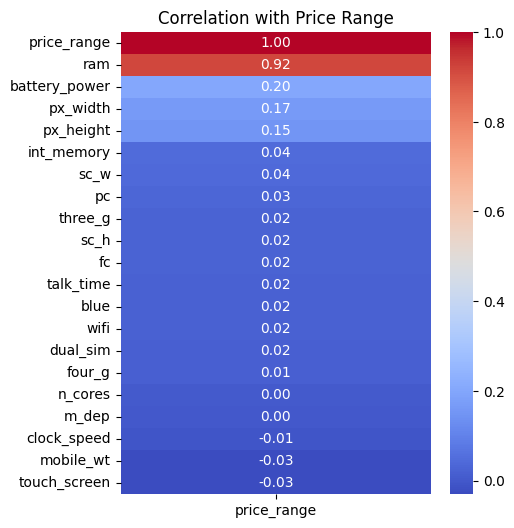

In [104]:
from matplotlib import pyplot as plt
import seaborn as sns


correlation = train_norm.corr()

plt.figure(figsize=(5, 6))
sns.heatmap(correlation[['price_range']].sort_values(by='price_range', ascending=False), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation with Price Range')
plt.show()

In [105]:
train_norm = train_norm.drop(columns=['n_cores', 'm_dep'])

In [106]:
X_train = train_norm.drop(columns=['price_range'])
y_train = train_norm['price_range']

X_test = test_norm.drop(columns=['n_cores', 'm_dep'])

In [ ]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier as KNN


